<a href="https://colab.research.google.com/github/huanyanwei/analytics-projects/blob/main/Benford_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Benfords Law

https://github.com/milcent/benford_py

In [ ]:
import pandas as pd 
df = pd.read_csv("/content/test2.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# split out bytes_in data
df['Bytes_In_Value'] = df['Bytes_In'].str.split('/').str[0].astype('float')
df['Bytes_Out_Value'] = df['Bytes_Out'].str.split('/').str[0].astype('float')

df['Bytes_In_Value']


0         140.0
1         120.0
2         120.0
3         120.0
4         140.0
          ...  
49653      60.0
49654    9060.0
49655    9060.0
49656     120.0
49657    1260.0
Name: Bytes_In_Value, Length: 49658, dtype: float64

In [ ]:
!pip install benford_py
import benford as bf

  Created wheel for benford-py: filename=benford_py-0.2.7-cp36-none-any.whl size=24791 sha256=d91a4c9e4b48e57801bc89dde568dc3a77e610f7367a822ec7823ad927fbd050
  Stored in directory: /root/.cache/pip/wheels/93/82/05/cdea70073a8625826e7d2a443a24fca408c95c07a6b31df125
Successfully built benford-py


In [ ]:
%matplotlib inline


Initialized sequence with 49179 registries.
First_1_Dig
1    0.232579
2    0.139470
3    0.105614
4    0.031823
5    0.067854
6    0.099331
7    0.012892
8    0.033836
9    0.276602
Name: Found, dtype: float64

Test performed on 49179 registries.
Discarded 0 records < 1 after preparation.


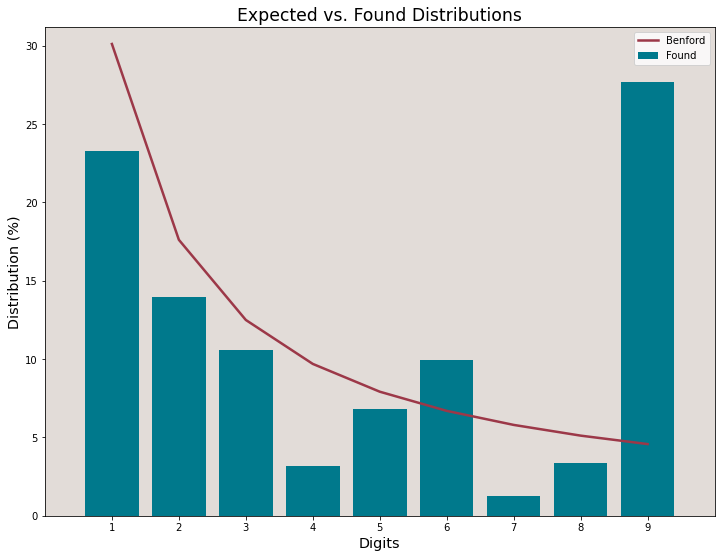

In [ ]:
f1d = bf.first_digits(df.Bytes_In_Value, digs=1, decimals=1)


Initialized sequence with 49179 registries.
First_2_Dig
10    0.021371
11    0.023262
12    0.034425
13    0.004636
14    0.004677
        ...   
95    0.003640
96    0.001220
97    0.001830
98    0.041400
99    0.000834
Name: Found, Length: 90, dtype: float64

Test performed on 49179 registries.
Discarded 0 records < 10 after preparation.


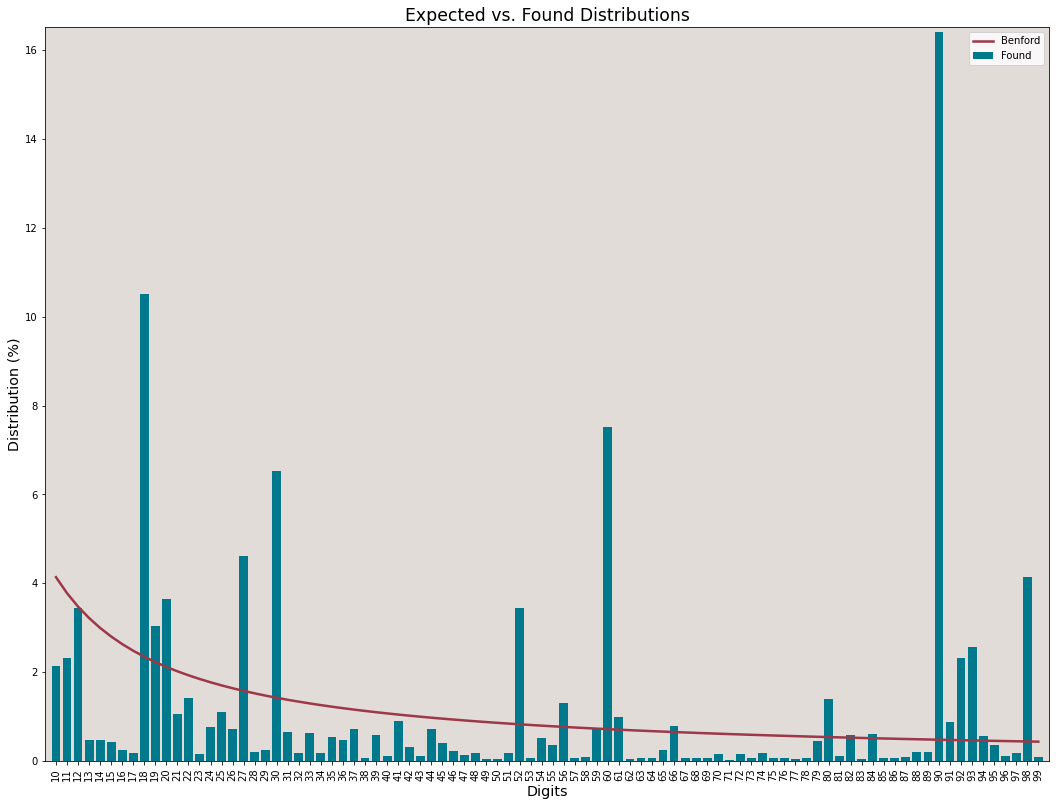

In [ ]:
f1d = bf.first_digits(df.Bytes_In_Value, digs=2, decimals=1)

In [ ]:
# Prepare data based on JH function

import re
import csv
import numpy as np

bytes_in = df['Bytes_In']
bytes_out = df['Bytes_Out']

# for x1/x2 current assumption is that only x1 is relevant
# function for regex parsing
def bytes_parser(x):
  parse= re.search('\d+', x)
  return parse.group(0)

# compute average bytes/s in each flow record
avg_bytes_in = []
avg_bytes_out = []
combine= []

for i,rows in df.iterrows():
  time_window = rows['Stop_Time'] - rows['Start_Time']
  avg_bytes_in.append(int(bytes_parser(rows['Bytes_In']))/time_window)
  avg_bytes_out.append(int(bytes_parser(rows['Bytes_Out']))/time_window)
  combine.append(rows['Source_IP'] + rows["Dest_IP"] + str(rows["Source_Port"]) + str(rows["Dest_Port"]) + str(rows["Protnum"]))

df['Bytes_In/s']= avg_bytes_in
df['Bytes_Out/s']= avg_bytes_out
df['profile'] = combine

df0 = df[['profile', 'Bytes_In/s', 'Bytes_Out/s']]
df0.head()

,profile,Bytes_In/s,Bytes_Out/s
0,fe80.IP_1ff02.IP_10058,0.117155,0.0
1,0.0.0.0224.IP_2002,1.200000,0.0
2,0.0.0.0224.IP_2002,1.200000,0.0
3,0.0.0.0224.IP_2002,1.200000,0.0
4,fe80.IP_1ff02.IP_10058,0.144033,0.0



Initialized sequence with 49178 registries.
First_1_Dig
1    0.385416
2    0.132905
3    0.120562
4    0.098581
5    0.053154
6    0.046830
7    0.037293
8    0.080930
9    0.044329
Name: Found, dtype: float64

Test performed on 49178 registries.
Discarded 0 records < 1 after preparation.


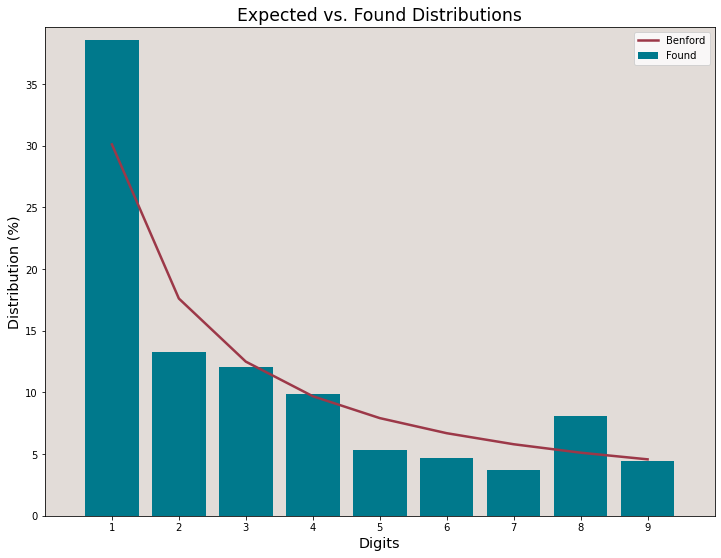

In [ ]:
f1d_2 = bf.first_digits(df['Bytes_In/s'], digs=1, decimals=6)


Initialized sequence with 49178 registries.
First_2_Dig
10    0.104295
11    0.028753
12    0.028570
13    0.030908
14    0.023262
        ...   
95    0.002765
96    0.003538
97    0.002786
98    0.004718
99    0.003070
Name: Found, Length: 90, dtype: float64

Test performed on 49178 registries.
Discarded 0 records < 10 after preparation.


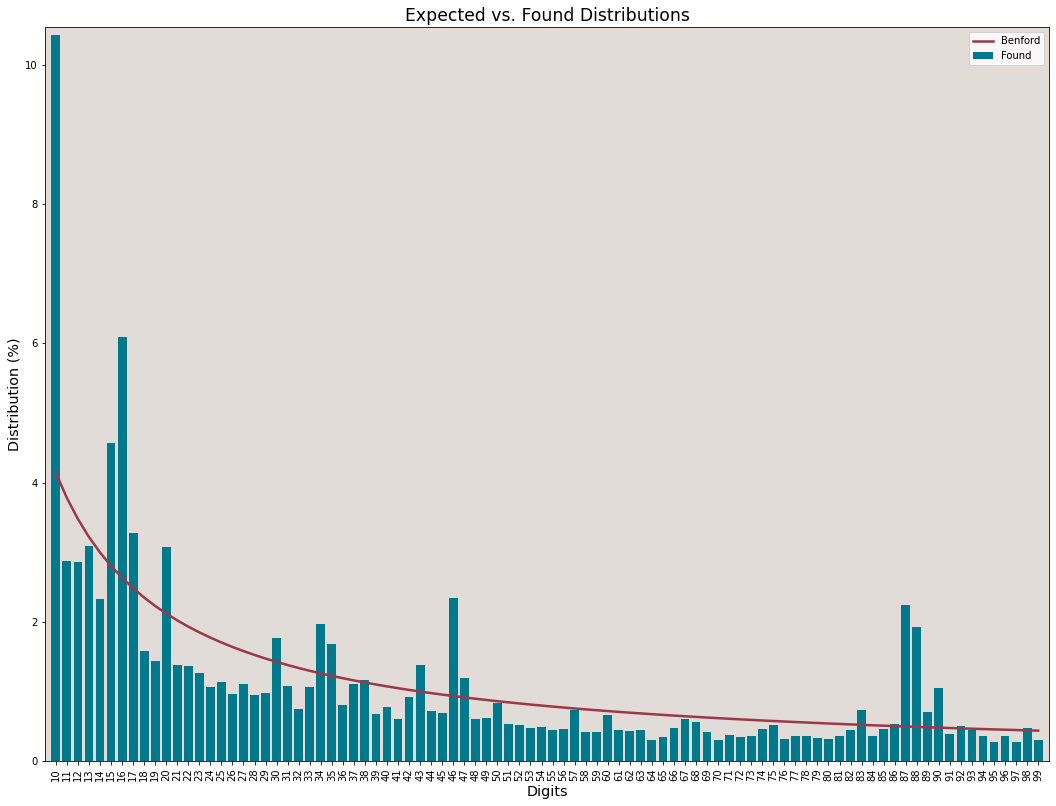

In [ ]:
f1d_2 = bf.first_digits(df['Bytes_In/s'], digs=2, decimals=6)


Initialized sequence with 49178 registries.
First_1_Dig
1    0.385416
2    0.132905
3    0.120562
4    0.098581
5    0.053154
6    0.046830
7    0.037293
8    0.080930
9    0.044329
Name: Found, dtype: float64

Test performed on 49178 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant positive deviations are:

             Expected     Found    Z_score
First_1_Dig                               
1            0.301030  0.385416  40.791589
8            0.051153  0.080930  29.964053

The Chi-square statistic is 3629.1886.
Critical Chi-square for this series: 15.507.


/usr/local/lib/python3.6/dist-packages/benford/benford.py:652: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  verbose=self.verbose)


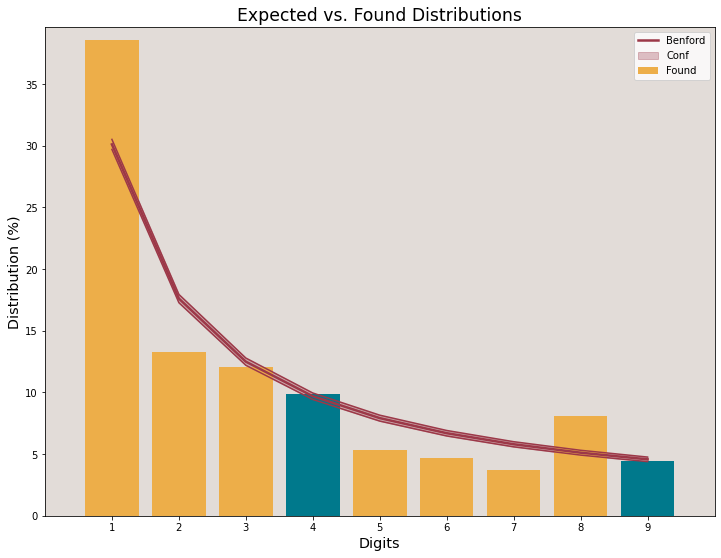

In [ ]:
f1d_3 = bf.first_digits(df['Bytes_In/s'], digs=1, decimals=6, confidence=95, chi_square=True)